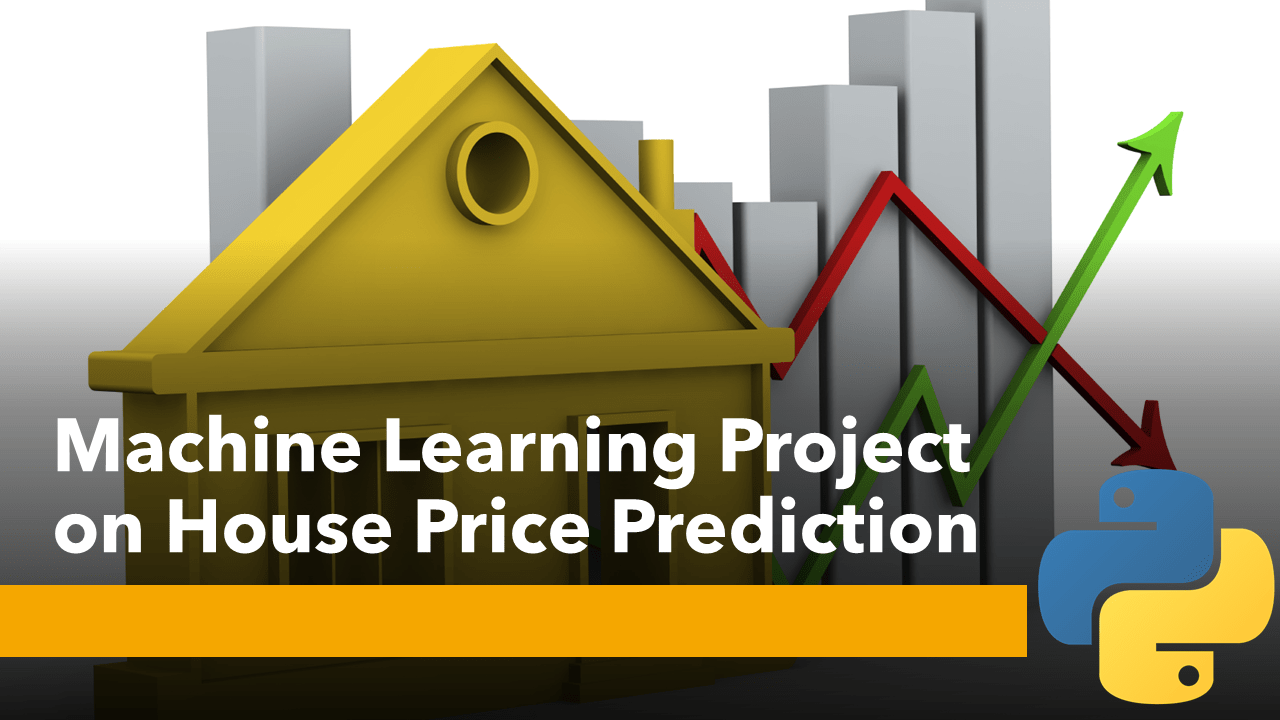

#HOUSING: PRICE PREDICTION

#Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

#Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.


#Importing  Libraries

In [1]:
import pandas as pd
#!pip install -U klib
import klib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
!pip install scikit-plot
import scikitplot as skplt

In [3]:
import plotly.express as px

In [4]:
data=pd.read_csv('/content/train.csv')

In [5]:
data.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0  127         120       RL  ...        WD         Normal    128000
1  889          20       RL  ...        WD         Normal    268000
2  793          60       RL  ...        WD         Normal    269790
3  110          20       RL  ...       COD         Normal    190000
4  422          20       RL  ...        WD         Normal    215000

[5 rows x 81 columns]

In [6]:
data.shape

(1168, 81)

GridSpec(6, 6)

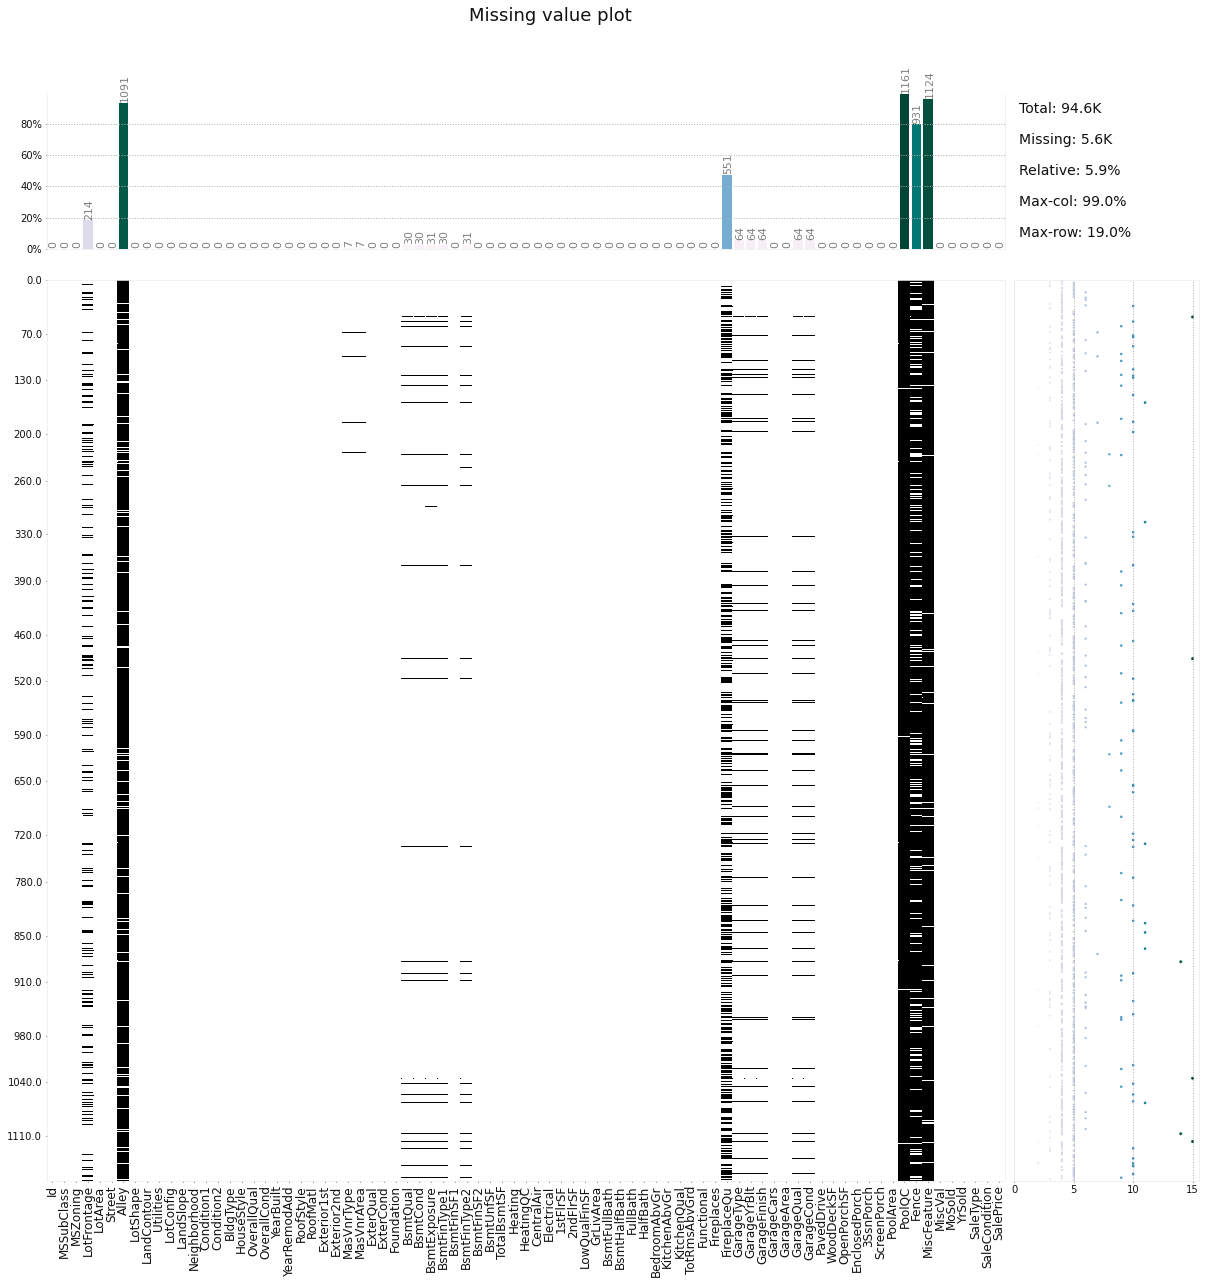

In [7]:
klib.missingval_plot(data)

**We have missing values and there are some columns which have more then 80% missing values so i will drop them after analysis**

In [8]:
data.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageCond        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
BsmtExposure      31
BsmtFinType2      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
Exterior2nd        0
Exterior1st        0
dtype: int64

**From this we can see the columns name which have many missing values like Alley,PoolQC,Fence,MiscFeature**

In [9]:
data.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1168.000000  1168.000000  ...  1168.000000    1168.000000
mean    724.136130    56.767979  ...  2007.804795  181477.005993
std     416.159877    41.940650  ...     1.329738   79105.586863
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     360.500000    20.000000  ...  2007.000000  130375.000000
50%     714.500000    50.000000  ...  2008.000000  163995.000000
75%    1079.500000    70.000000  ...  2009.000000  215000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

**From upper function we can see the spread of our data like saleprice has min value of 34900 and max 755000 same with other it help to understand the spread of data**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

**From info it help to understand which column is object type and which one is numerical**

we have 38 numerical columns and 43 categorical columns

we have some columns that should be object

ex-mssubclass,overallqual,overallcond

they have converted them into numerical so no problem

so i will do analysis of that also

In [11]:
data1=data.select_dtypes(include='object').head()

In [12]:
{column:len(data[column].unique())for column in data.select_dtypes(include='object')}

{'Alley': 3,
 'BldgType': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'BsmtQual': 5,
 'CentralAir': 2,
 'Condition1': 9,
 'Condition2': 8,
 'Electrical': 5,
 'ExterCond': 5,
 'ExterQual': 4,
 'Exterior1st': 14,
 'Exterior2nd': 15,
 'Fence': 5,
 'FireplaceQu': 6,
 'Foundation': 6,
 'Functional': 7,
 'GarageCond': 6,
 'GarageFinish': 4,
 'GarageQual': 6,
 'GarageType': 7,
 'Heating': 6,
 'HeatingQC': 5,
 'HouseStyle': 8,
 'KitchenQual': 4,
 'LandContour': 4,
 'LandSlope': 3,
 'LotConfig': 5,
 'LotShape': 4,
 'MSZoning': 5,
 'MasVnrType': 5,
 'MiscFeature': 5,
 'Neighborhood': 25,
 'PavedDrive': 3,
 'PoolQC': 4,
 'RoofMatl': 8,
 'RoofStyle': 6,
 'SaleCondition': 6,
 'SaleType': 9,
 'Street': 2,
 'Utilities': 1}

**From upper code it help us to see how many unique values are there in each column**

#EDA

#Univariate Analysis

In [13]:
col=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','MSSubClass','OverallQual','OverallCond','GarageCars']

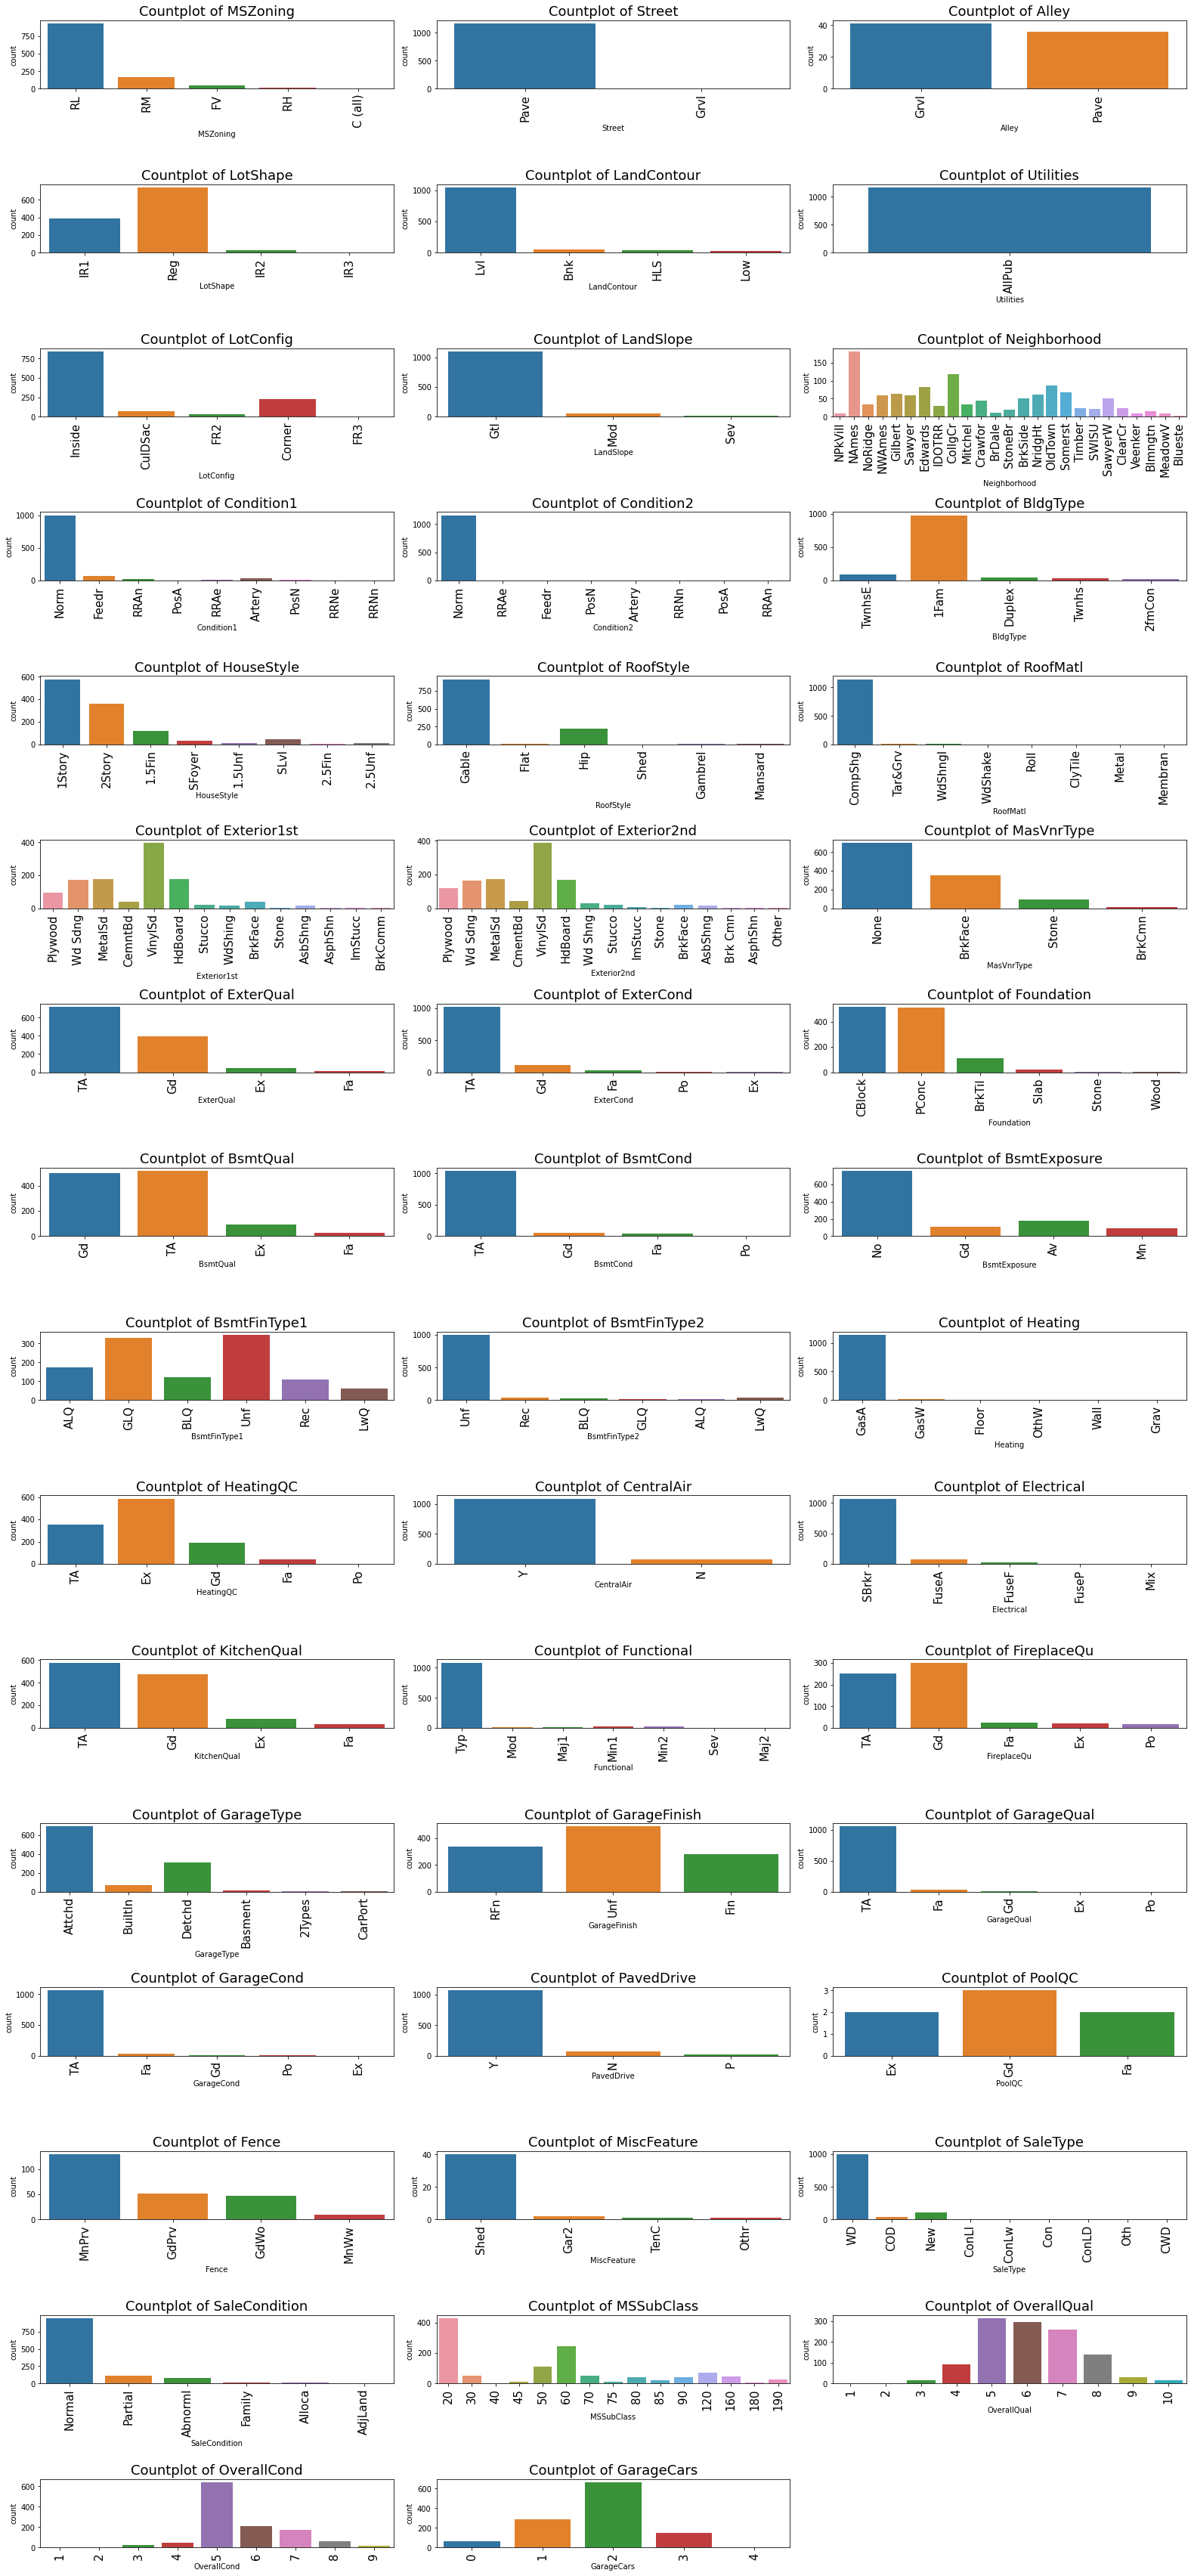

In [14]:
plt.figure(figsize=(22,300))
for i in range(len(col)):
  plt.subplot(100,3,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=18)
  plt.xticks(rotation=90,fontsize=15)
  plt.tight_layout()

#Obseravtion
1-From MSZoning i can say most of the people like house that have zone Residential Low Density, low density says people like to live in more space like villas

2-From Street i can say most of the people like to have home that are paved

3-From Type of alley access to property i can say mostly people like to have home at grvl

4-From lotshape i can say mostly people like reg and very less people who like to live in IR2,IR3

5-From LandContour: Flatness of the property i can say mostly people like to live in Near Flat/Level

6-From Lot configuration i can say mostly people like inside lot and some people like 20% of people like corner plot

7-From LandSlope: Slope of property i can say mostly 90% of people like Gentle slope

8-From Neighborhood: Physical locations within Ames city limitsi can say mostly people like to have have at North Ames after this people also like College Creek

9-From Condition1: Proximity to various conditions i can say mostly people like Normal and same with condition 2

10-From BldgType: Type of dwelling i can say mostly people like Single-family Detached	

11-From HouseStyle: Style of dwelling i can say moslty people like onestory and twostory more

12-From RoofStyle: Type of roof i can say mostly people like Gable style

13-From RoofMatl: Roof material i can say mostly people like clay or tile on roof

14-From Exterior1st and Exterior2nd i can say moslty people like Vinyl Siding and people also like Metal Siding and hard bord

15-From MasVnrType: Masonry veneer type i can say people like None 

16-Form exterqual and extercond i can say mostly people are happy with Average quality

17-From Foundation: Type of foundation i can say moslty people like Cinder Block and Poured Contrete	

18-From bsmntqual and bsmtcond i can say people like Good (90-99 inches) and typical also

19-From BsmtExposure: Refers to walkout or garden level walls people like No Exposure

20-From BsmtFinType1: Rating of basement finished area i can say moslty people like Good Living Quarters and unfinished

21-From BsmtFinType2 i can say people like good living quarters

22-From CenteralAir i can say moslty people like to lave centeralair

23-From Electrical: Electrical system i can say people like SBrkr	Standard Circuit Breakers & Romex

24-From Countplot of Garage type i can say people love to have a home that have garage Attached to home

25-From Salestype i cna say people love to have a home that have Warranty Deed - Conventional

26-From salesconditon i can say people love to have a home that have normal condition 

In [15]:
data2=data.select_dtypes(exclude='object')

In [16]:
col1=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

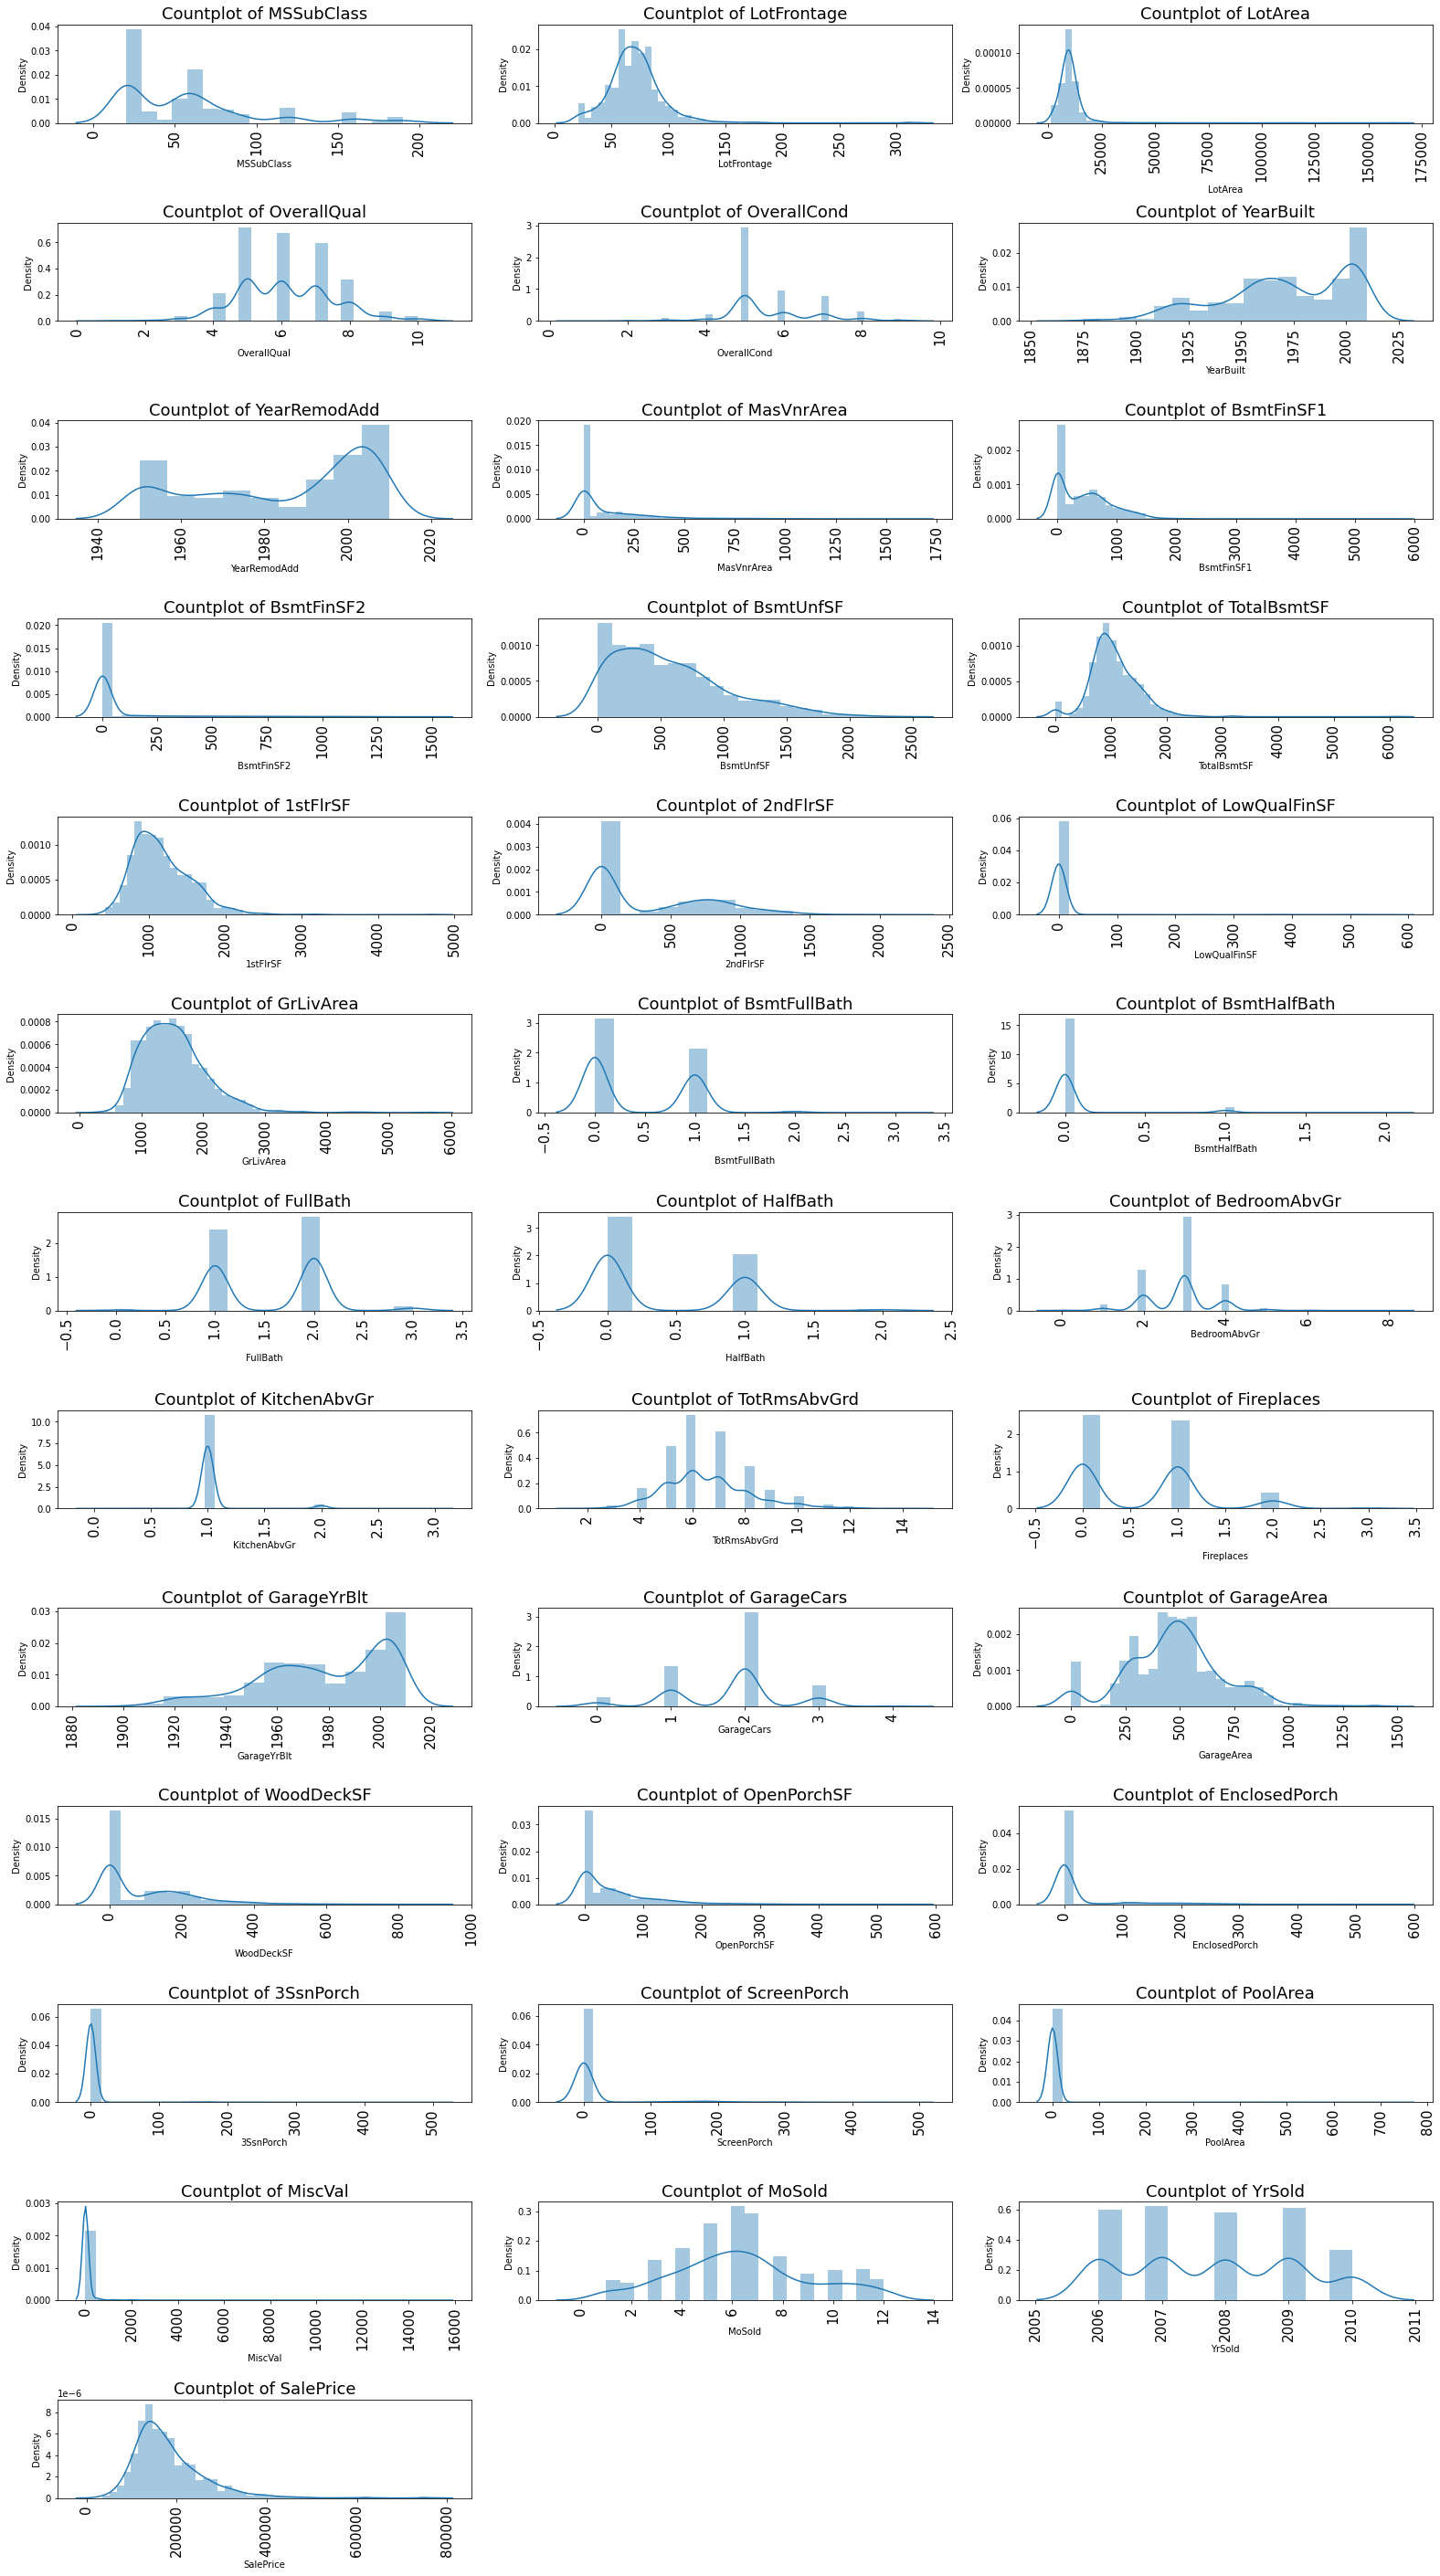

In [17]:
plt.figure(figsize=(22,300))
for i in range(len(col1)):
  plt.subplot(100,3,i+1)
  sns.distplot(data[col1[i]])
  plt.title(f"Countplot of {col1[i]}",fontsize=18)
  plt.xticks(rotation=90,fontsize=15)
  plt.tight_layout()

#Observation
1-From LotFrontage i cna say mostly people have value between 60-40

2-From LotArea i can say the value is between 0-25000

3-From Total square feet of basement area i can say the value is mostly in between 100-2000 and moslty people have the basement of size 800-1100

4-From grlivarea i can say moslty people have the are between 1200-1900

5-From GarageArea i can say mostly people like to have area between 450-600

6-From saleprice i can say moslty people buy home between price 140000-190000 and also it is right skewed

In [18]:
from numpy import mean
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

#Bivariate Analysis

Text(0, 0.5, 'Average SalesPrice')

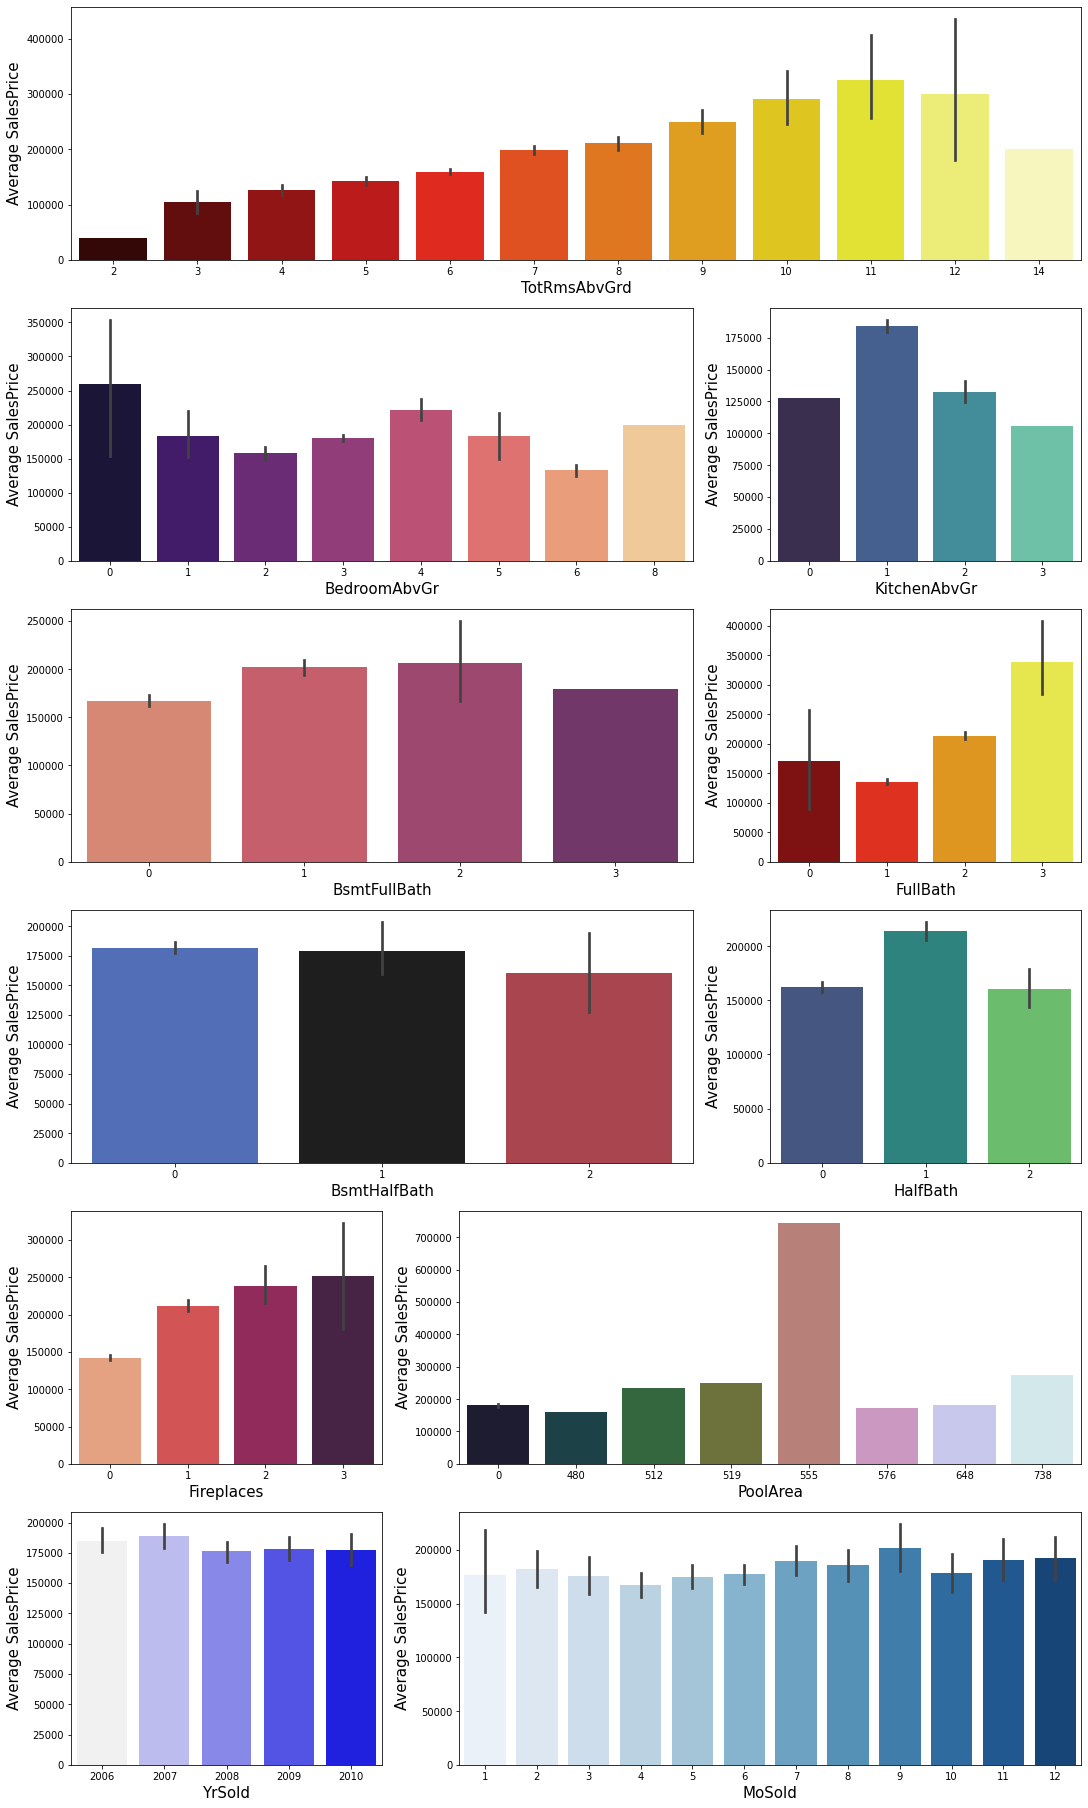

In [19]:
fig=plt.figure(constrained_layout=True,figsize=(15,25))
gs=GridSpec(6,3,figure=fig)

plt.subplot(gs[0,:])
a1=sns.barplot(data=data,x="TotRmsAbvGrd",y="SalePrice",estimator=mean,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1=sns.barplot(data=data,x="BedroomAbvGr",y="SalePrice",estimator=mean,palette='magma')
plt.xlabel("BedroomAbvGr",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[1,-1])
a1=sns.barplot(data=data,x="KitchenAbvGr",y="SalePrice",estimator=mean,palette='mako')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1=sns.barplot(data=data,x="BsmtFullBath",y="SalePrice",estimator=mean,palette='flare')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[2,-1])
a1=sns.barplot(data=data,x="FullBath",y="SalePrice",estimator=mean,palette='hot')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[3,:-1])
a1=sns.barplot(data=data,x="BsmtHalfBath",y="SalePrice",estimator=mean,palette='icefire')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[3,-1])
a1=sns.barplot(data=data,x="HalfBath",y="SalePrice",estimator=mean,palette='viridis')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1=sns.barplot(data=data,x="Fireplaces",y="SalePrice",estimator=mean,palette='rocket_r')
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1=sns.barplot(data=data,x="PoolArea",y="SalePrice",estimator=mean,palette='cubehelix')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1=sns.barplot(data=data,x="YrSold",y="SalePrice",estimator=mean,palette='light:b')
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1=sns.barplot(data=data,x="MoSold",y="SalePrice",estimator=mean,palette='Blues')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

#Obseravtion

1-Total Rooms Above Ground-As the room no. increasing the average price is also increasing till 11th room after that price start decreasing

2-Bedroom ABove Ground-For the 0,4,8 Bedroom price is high and price is very less for 6 and 2

3-Kitchen Above Ground-as the no of kitchen is increasing the price is reducing and mostly people take one kitchen only

4-In Basement full bathrrom and half bathrooms as the bathroom size increasing the price is also increasing

5-Fireplaces-As the fireplaces increasing the sale price is also increasing

6-PoolArea-as big the pool the more costly the house

7-YRsold-the price was high in 2006 as comapre to old year prices descresed in 2008-10

8-MOSold-most of the people who sold there home in 09 month they got high price and people who sold there home on 4th month got less price

Text(0.5, 1.0, 'Land Slope')

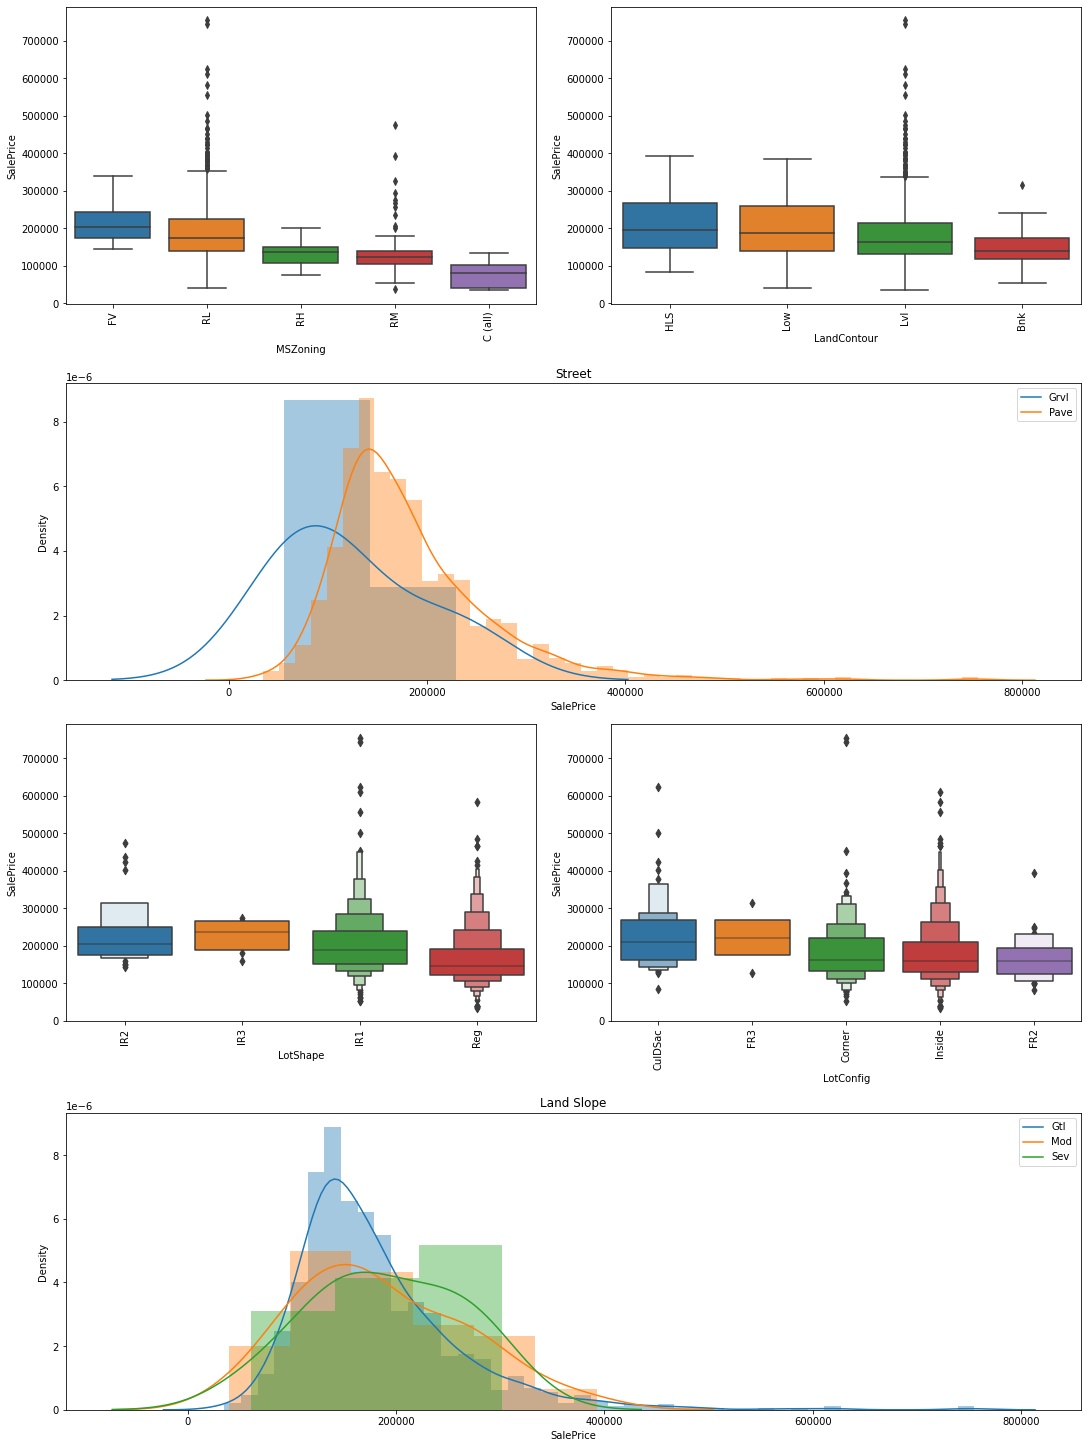

In [20]:
fig=plt.figure(constrained_layout=True,figsize=(15,20))
gs=gridspec.GridSpec(4,2,figure=fig)

plt.subplot(gs[0,0])
table=data.groupby(['MSZoning'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='MSZoning',y='SalePrice',order=table['MSZoning'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[0,1])
table=data.groupby(['LandContour'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='LandContour',y='SalePrice',order=table['LandContour'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[1,:])

a1=sns.distplot(data[data['Street']=='Grvl']['SalePrice'])
a1=sns.distplot(data[data['Street']=='Pave']['SalePrice'])
plt.legend('upper right',labels=['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table=data.groupby(['LotShape'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='LotShape',y='SalePrice',order=table['LotShape'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[2,1])
table=data.groupby(['LotConfig'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='LotConfig',y='SalePrice',order=table['LotConfig'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[3,:])

a1=sns.distplot(data[data['LandSlope']=='Gtl']['SalePrice'])
a1=sns.distplot(data[data['LandSlope']=='Mod']['SalePrice'])
a1=sns.distplot(data[data['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right',labels=['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

#Obseravtions

1-MSZoning-Floating Village Residential zone (FV) is having higher sale price of around 2 lakhs. While Commercial Zones are Having the lowest sale prices and we see a varaition in sale prices in different zones which makes it an important feature foe our prediction.

2-LandCountour-if the house has significant slope on both sides (HLS) or in nearly flat  (Low),sale prices is more. For depressed and blanked slopes,Sale price fall down

3-Street-For flat stones or bricks access,Price is higher and majority of houses with gravel have price around 2 lakhs but as there is very less data for gravel street type this feature is not that important

4-LotShape-We can see that houses with regular Shapes have low price and as the irregularity increases, the average sale price of the house also increases

5-LotConfig-The configuration of the lot does not appear to vary the prices.the property with cul de sac and fr3 configuration on average are having high value than the other configuration

6-LandSlope-Most of the properties having gentle slope and are lowest prices,while properties having moderate or severe slope have higher value.

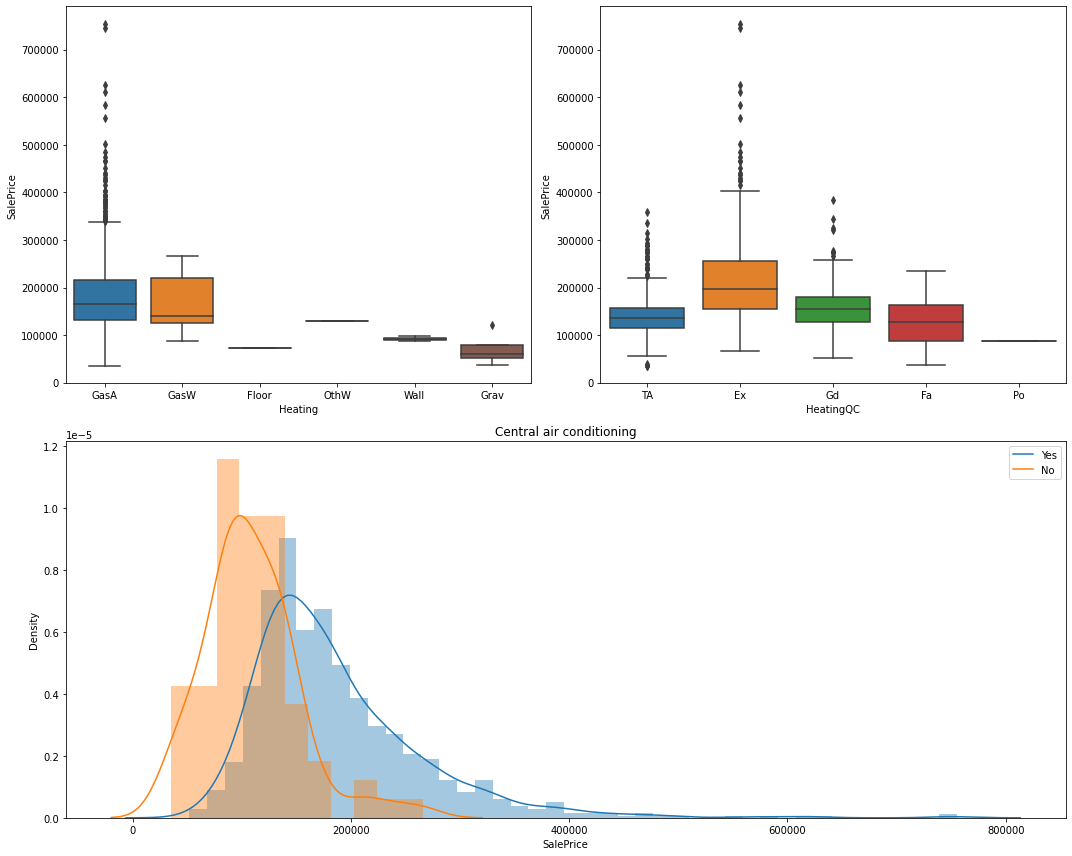

In [21]:
fig=plt.figure(tight_layout=True,figsize=(15,12))
gs=gridspec.GridSpec(2,2)
plt.subplot(gs[0,0])
ax1=sns.boxplot(data=data,x='Heating',y='SalePrice')

plt.subplot(gs[0,1])
ax1=sns.boxplot(data=data,x='HeatingQC',y='SalePrice')

plt.subplot(gs[1,:])
sns.distplot(data[data['CentralAir']=='Y']['SalePrice'])
sns.distplot(data[data['CentralAir']=='N']['SalePrice'])
plt.legend('upper right',labels=['Yes','No'])
plt.xlabel("SalePrice")
plt.title("Central air conditioning")
px.histogram(data,x='SalePrice',color='Electrical',barmode='overlay',title='Electrical System')

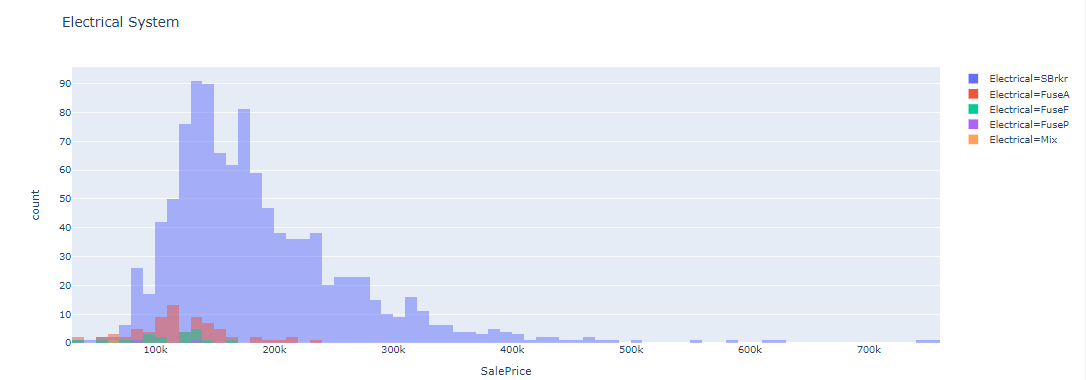

1-Electrical-Most of the properties have standard circuit breakers and having highest average sale price of 170000.

Properties with poor fuse box system and mixed system have less than 10000 sale price.

2-Heating Quality-It can be clearly seen in the box plot.

3-Heating-Heating in the wall or hot water/steam is associated with very low houses prices. Gas Formed warm air appears to drive a higher sales price

4-Central AC- The properties which have AC  will have higher price that the ones which dont have

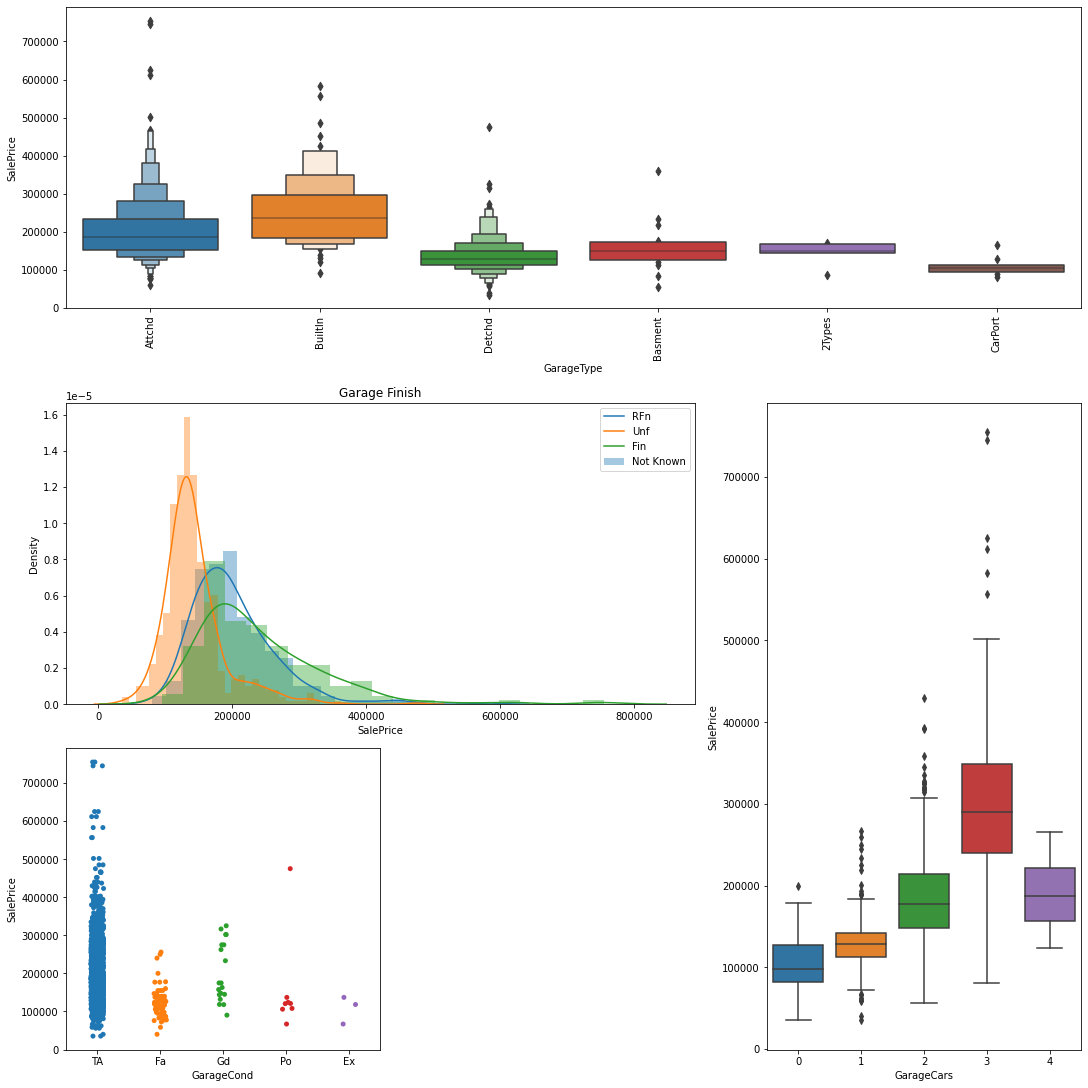

In [22]:
fig=plt.figure(constrained_layout=True,figsize=(15,15))
gs=GridSpec(3,3,figure=fig)

plt.subplot(gs[0,:])
a1=sns.boxenplot(data=data,x='GarageType',y='SalePrice')
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[1,:-1])
sns.distplot(data[data['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right',labels=['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1=sns.boxplot(data=data,x="GarageCars",y="SalePrice")


plt.subplot(gs[-1,0])
a1=sns.stripplot(data=data,x="GarageQual",y="SalePrice")


plt.subplot(gs[-1,0])
a1=sns.stripplot(data=data,x="GarageCond",y="SalePrice")

#Obseravtion
1-Garage Type-Houses with built in or attached garages tend to have the highest prices. Those without a garage or a car port tend to have the lowest prices.

2-Garage Finish-Finished and roughly finished garages account for higher sale price than unfinished ones.and the properties which dont have a garage have the lowest price.

3-GarageCars-here garage cars refers to size of garage in car capacity so higher the number more the sale price

Text(0.5, 0.98, 'Sale Type and Condition')

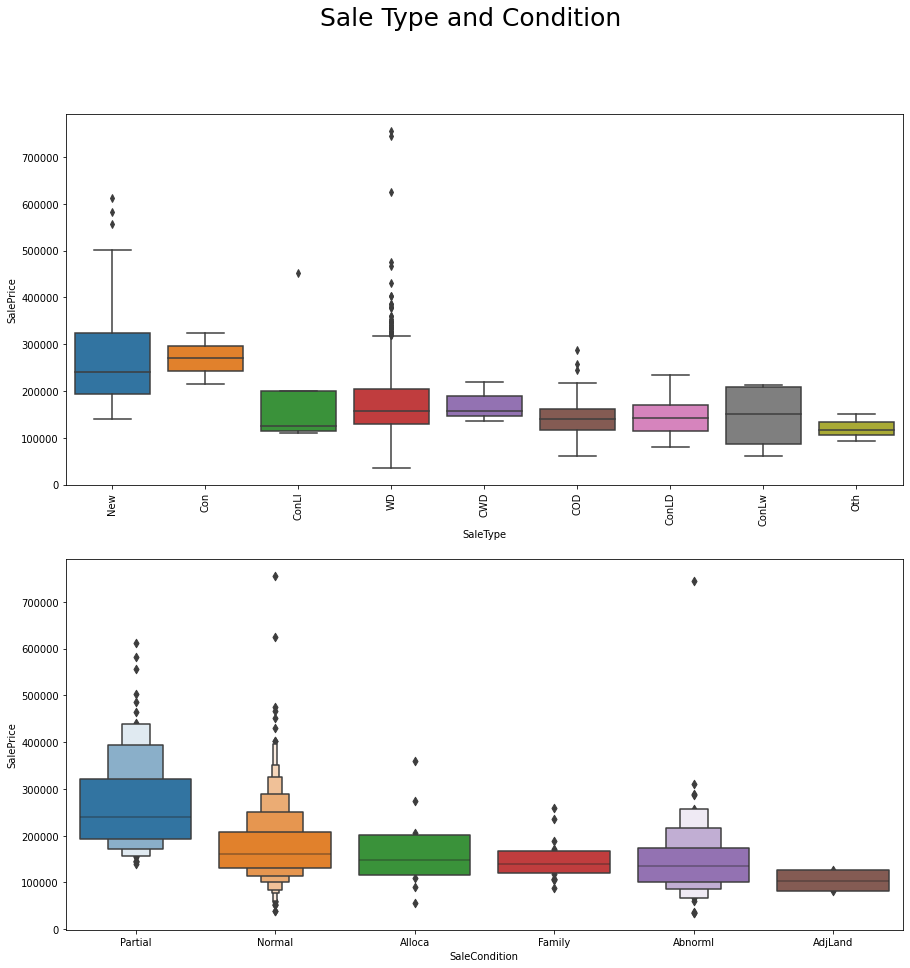

In [23]:
fig=plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
table=data.groupby(['SaleType'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='SaleType',y='SalePrice',order=table['SaleType'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
table=data.groupby(['SaleCondition'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='SaleCondition',y='SalePrice',order=table['SaleCondition'].to_list())

fig.suptitle("Sale Type and Condition",fontsize=25)

#Obseravtion
1-Sale Type-Most of the properties are on warranty deed sale. The manor in which the house is sold appears to have different price ranges

2-Sale Condition-if the house to be sold is in partial or normal condition,the price will definitely be higher than the rest of the conditions.

**bases on the analysis of the above categorical features,we can conclude that the following features are important in predicting the sale price.**

1-MSSubclass and mszoning

2-all the quality features,as the houses with average,good,excellent quality features will have higher sale price

3-Fireplaces and garage cars,more the no. , higher the sale price

4-we also saw variation in absement exposure

5-And lastly sale type and sale conditon are also one of the important features

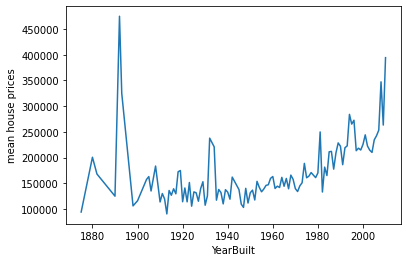

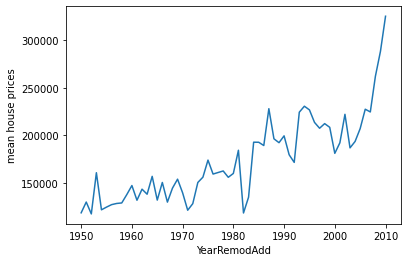

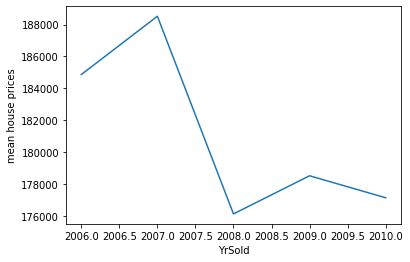

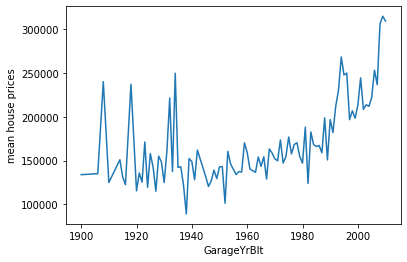

In [24]:
year_features=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
for feature in year_features:
  ax=data.groupby([feature])['SalePrice'].mean().plot()
  plt.ylabel("mean house prices")
  plt.show()

#Obseravtion
WE can see that the houses and garage which were built during 0s have less sale price than the newer ones

with every year,house price increases

But if see,Year Sold feature the price fall down with each year which is strange.

Due to the strange behaviour in year sold,we subtract each feature with year sold

#Checking Skewness

In [25]:
data.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

**There are skewness so we need to remove them**

In [26]:
data.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0  127         120       RL  ...        WD         Normal    128000
1  889          20       RL  ...        WD         Normal    268000
2  793          60       RL  ...        WD         Normal    269790
3  110          20       RL  ...       COD         Normal    190000
4  422          20       RL  ...        WD         Normal    215000

[5 rows x 81 columns]

In [27]:
data2=data.select_dtypes(exclude='object')

In [28]:
X_col=data2.columns.values

#Checking Outliers

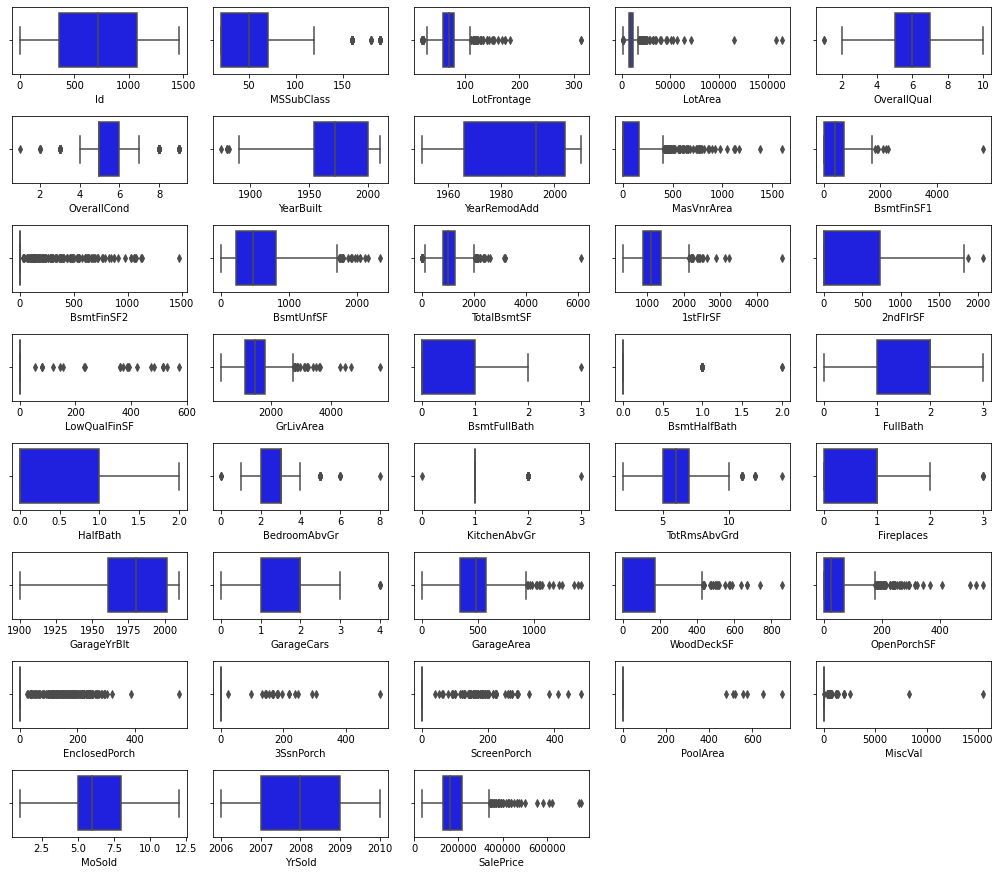

In [29]:
plt.figure(figsize=(14,30))
for i in range(0,len(X_col)):
  plt.subplot(20,5,i+1)
  ax=sns.boxplot(data2[X_col[i]],color='blue')
  plt.tight_layout()

**There Are many outliers so we need to remove them**

#Building Pipeline

#Treating Missing Values

In [30]:
class Preprocess_Missingvalues:
  def __init__(self):
    pass

  def fit(self,X,y=None):
    return self

  def transform(self,X):
    X['LotFrontage']=X.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))
    X['Electrical']=X['Electrical'].fillna(X['Electrical'].mode()[0])
    for col in ['FireplaceQu','GarageType','GarageFinish','BsmtFinType2','PoolQC','Fence','MiscFeature','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','MasVnrType','Alley']:
                X[col]=X[col].fillna('None')
    for col in ['GarageYrBlt','MasVnrArea']:
      X[col]=X[col].fillna(0)

    X=X.drop(['Utilities','Id'],axis=1)
    return X

*Here i am creating a class which can treat missing value as the value is from categorical column or from numerical column it will handle it and i am also droping some columns that are not useful like id it only represent the unique ids*

#Feature Engineering

In [31]:
class Feature_Engineering:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self 
  def transform(self,X):
     X['SqFtPerRoom']=X['GrLivArea']/X['TotRmsAbvGrd']+(X['TotRmsAbvGrd']+
                                                        X['FullBath']+
                                                        X['HalfBath']+
                                                        X['KitchenAbvGr'])
     X['Total_Home_Quality']=X['OverallQual']+X['OverallCond']
     X['Total_Bathrooms']=(X['FullBath']+(0.5*X['HalfBath'])+
                           X['BsmtFullBath']+(0.5*X['BsmtHalfBath']))
     X['HighQualSF']=X['1stFlrSF']+X['2ndFlrSF']
     return X

*Here i am creating more features for my column so it can perform well with machine learning models feature engineering is one of the most important method in ML so we have many bathrooms like some are fullbath and we also have many halfbathrooms like 2-3 half bathrooms form here i can am creating a total bathroom feature and also we have a are of different different things so from there i am creating the sqftperroom*

#Removing Skewness

In [32]:
class skewness_remove:
  def __init__(self,skew=0.5):
    self.skew=skew
  
  def fit(self,X,y=None):
    return self

  def transform(self,X):
    x=X.copy()
    X_num=X.select_dtypes(exclude='object')
    skewness=X_num.apply(lambda x:x.skew())
    skewness_col=skewness[abs(skewness)>=self.skew].index
    X[skewness_col]=power_transform(X[skewness_col])
    X=pd.DataFrame(X,columns=x.columns)
    X = pd.get_dummies(X)
    return X

*Here i am removing skewness as we seen above we had a lot of skewness of i have created a class where if my any column is having skewness more then 0.5 it will remove the skewness of that*

#Feature Transformation

In [33]:
class Encoding:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    le=LabelEncoder()
    cols= ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')
    for c in cols:
      X[c]=le.fit_transform(X[c])
    return X

*Here i am using LabelEncoder because we already have many columns if i will use onehot i will increase the dimension of the data which will create the problem for machine learning model to understand things thats why i am using labelencoder*

#Removing Outliers

In [34]:
class remove_outliers:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    for col in X.columns:
      percentile=X[col].quantile([0.01,0.98]).values
      X[col][X[col]<=percentile[0]]=percentile[0]
      X[col][X[col]>=percentile[1]]=percentile[1]
    return X

*As we have seen above we had lot of outliers so i am using here percentile method to remove outliers somethimes what happen is if i am using zscore and IQR method it will delete all the data so with the help of percentile method we can replace the outliers with percentile value and we also dont loose the data as well*

#Feature Scaling

In [35]:
class Feature_Scaling:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    x=X.copy()
    scale=StandardScaler()
    X=scale.fit_transform(X)
    X=pd.DataFrame(X,columns=x.columns)
    return X

*In this am using StandardScaler to scale my all big value in same scale*

In [36]:
from sklearn.pipeline import Pipeline

#Pipeline For Machine Learning

In [37]:
pipe=Pipeline([
               ("Preprocess_Missingvalues",Preprocess_Missingvalues()),                       #Removing and treating missing values
               ("Feature_Engineering",Feature_Engineering()),                                 #Adding more columns
               ("Encoding",Encoding()),                                                       #Feature transformation converting all the categorical columns into no. 
               ("remove_outliers",remove_outliers()),
               ("skewness_remove",skewness_remove()),
               ("Feature_Scaling",Feature_Scaling())                                          #scaling all the values
])

In [38]:
X=data.drop(['SalePrice'],axis=1)
y=data['SalePrice']

*Separating data into X and Y for ML*

In [39]:
X_new=pipe.fit_transform(X)

In [40]:
X_new.head(10)

MSSubClass  MSZoning  ...  Total_Bathrooms  HighQualSF
0    1.370435 -0.162061  ...        -0.261653   -1.262452
1   -1.167999 -0.162061  ...         1.061336    1.383284
2    0.490047 -0.162061  ...         1.722831    1.067513
3   -1.167999 -0.162061  ...        -0.261653    0.783280
4   -1.167999 -0.162061  ...         0.399842    0.332431
5    0.490047 -0.162061  ...         0.399842    0.816380
6   -1.167999 -0.162061  ...         0.399842   -0.111591
7   -1.167999 -0.162061  ...         1.061336    0.710797
8   -1.167999 -0.162061  ...        -0.261653   -0.538005
9    0.237618 -0.162061  ...        -1.584642   -0.532909

[10 rows x 82 columns]

#Checking multicollinearity

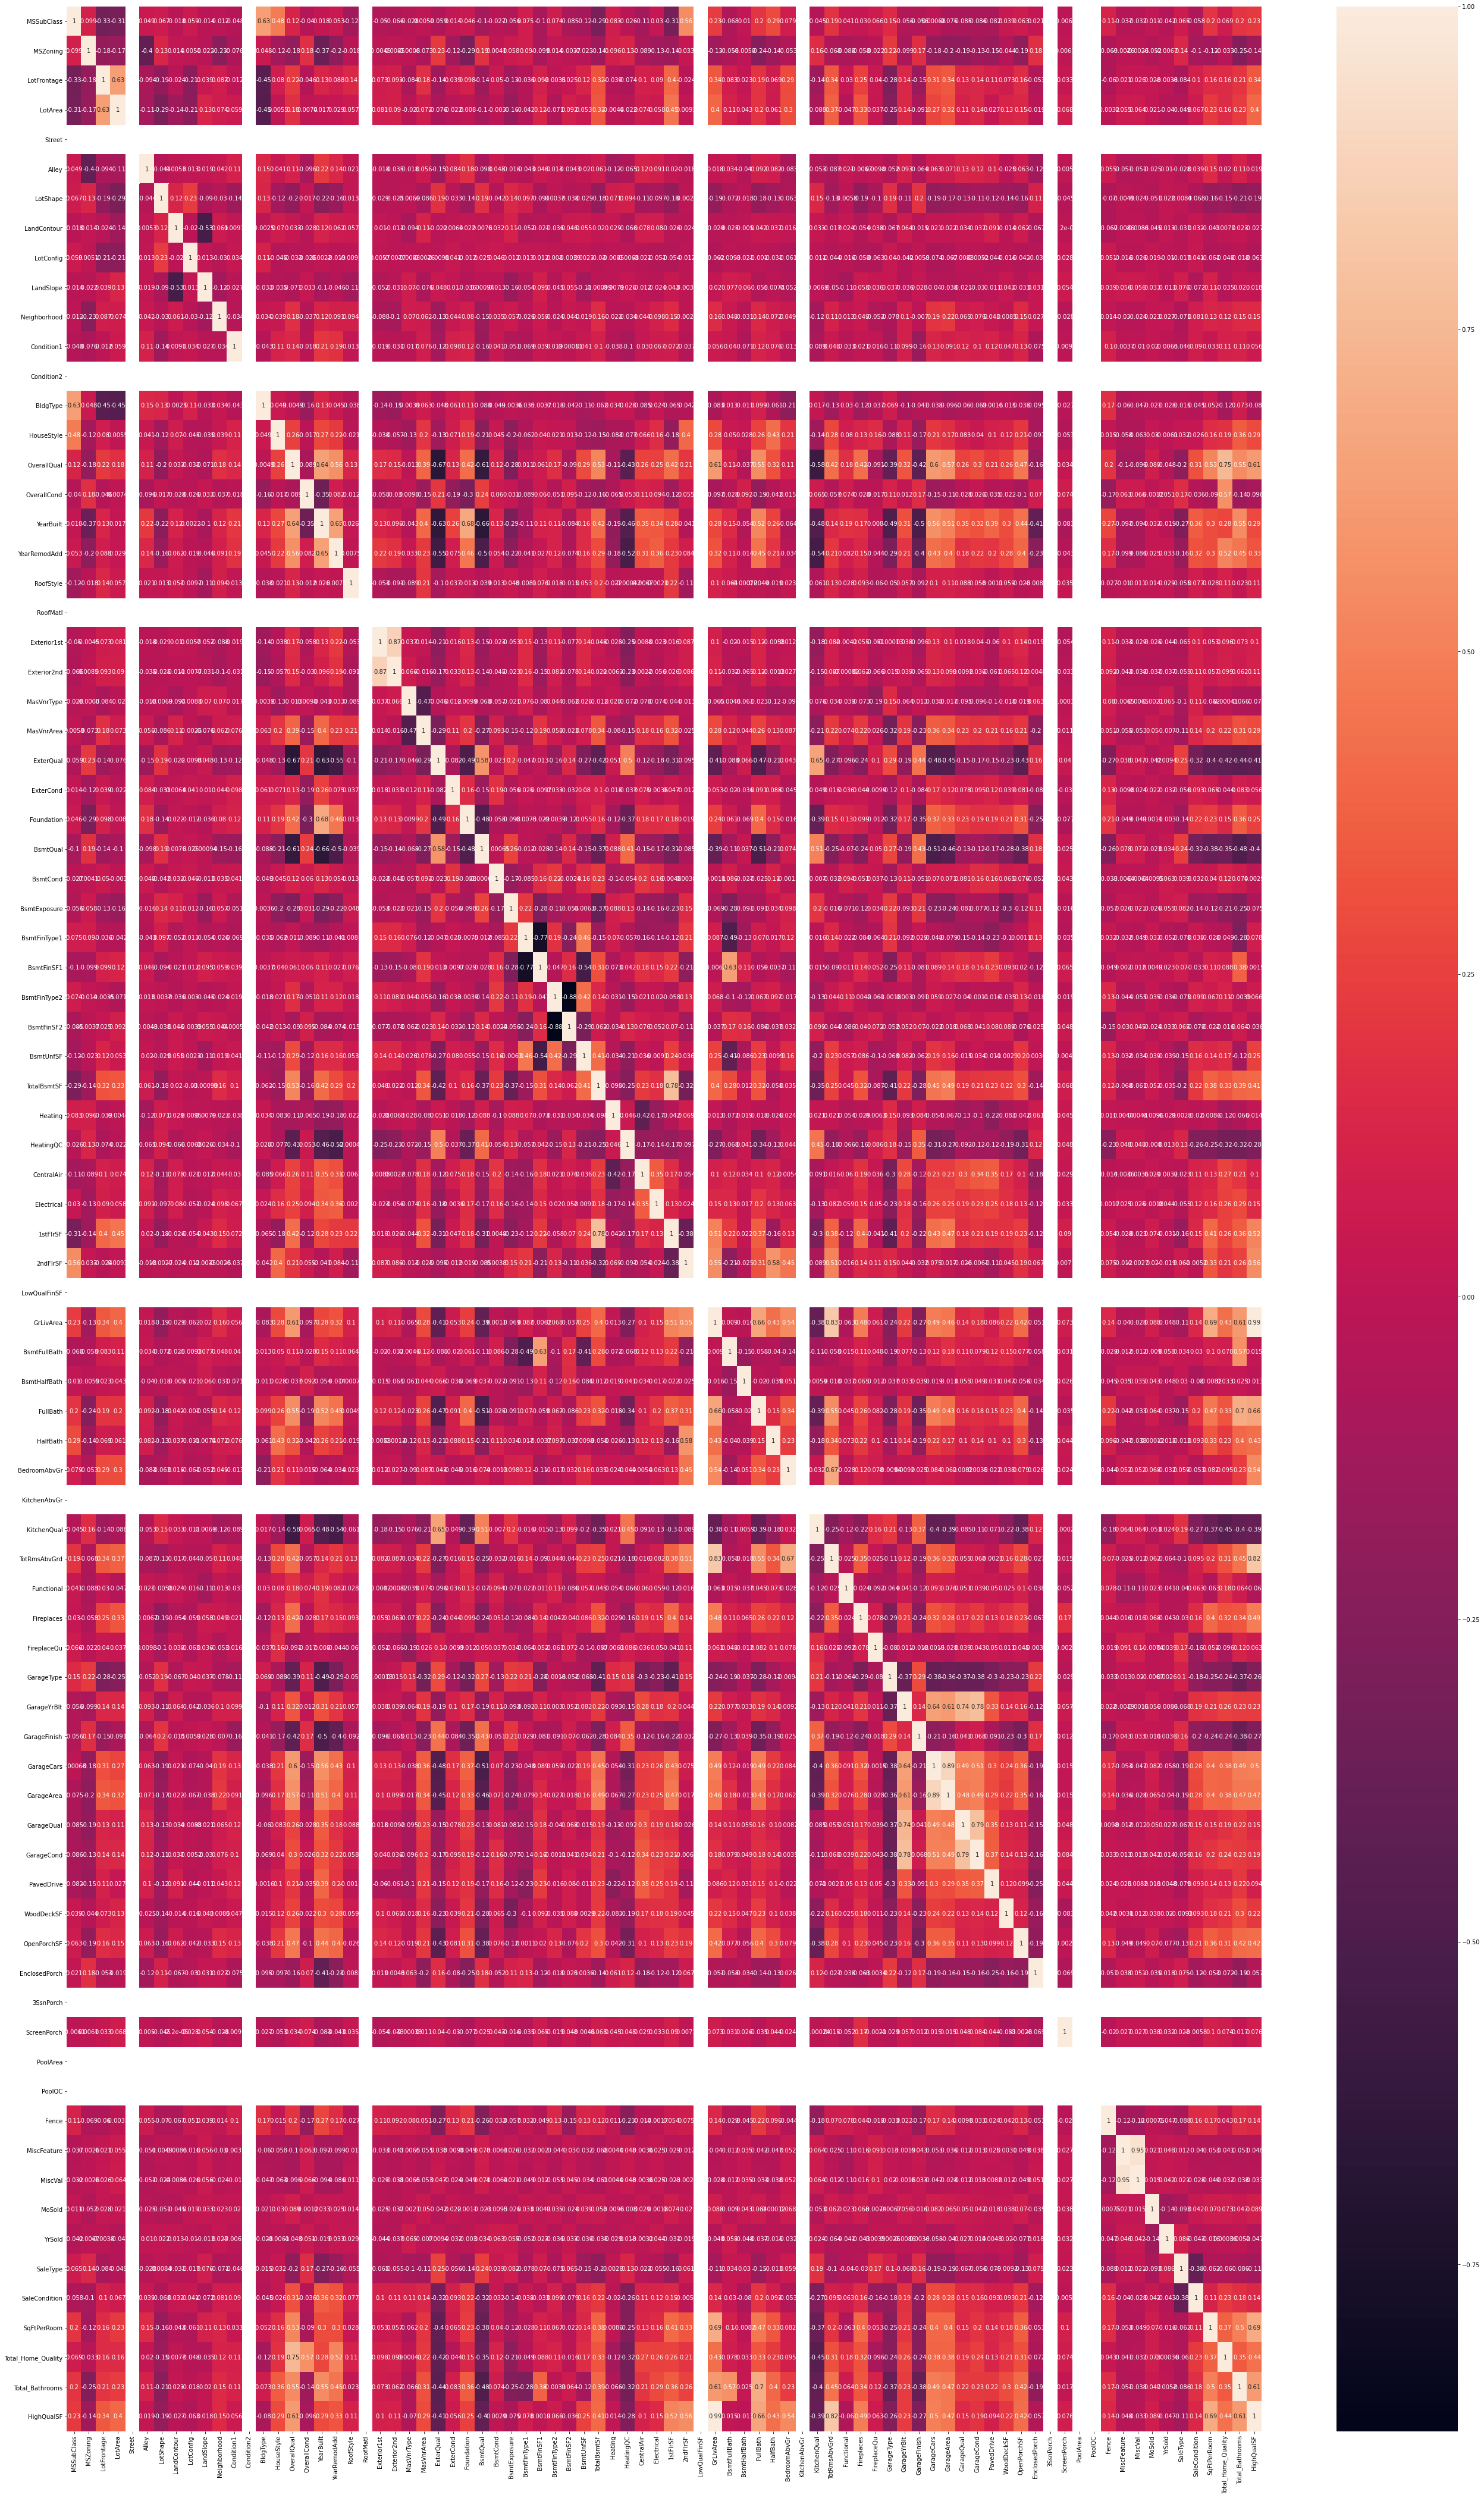

In [41]:
X_corr=X_new.corr()
plt.figure(figsize=(45,75))
sns.heatmap(X_corr,annot=True)

**The heatmap is very big so this code will help me to understand the which feature is highly correlated to each other**

In [42]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        print(corr_matrix.iloc[i,j],corr_matrix.columns[i],corr_matrix.columns[j])
        col_corr.add(colname)
        return col_corr

In [43]:
corr_features=correlation(X_new,0.90)

0.9506047534330135 MiscVal MiscFeature


In [44]:
X_new=X_new.drop(['MiscVal','HighQualSF'],axis=1)

*There total four columns that are highly correlated to each other i am dropping two of them*

#Target Column Transformation

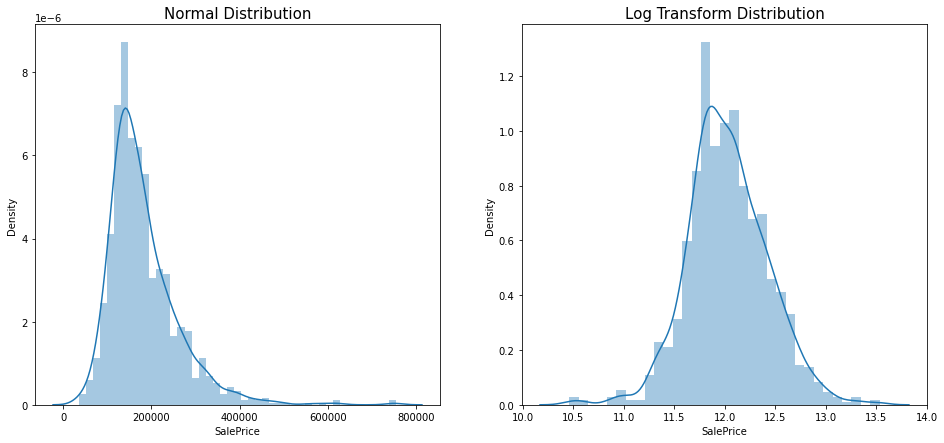

In [45]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Log Transform Distribution",fontsize=15)
sns.distplot(np.log(y))

*Here my target column is right skewed and we can transform your target column if my target column is right skewed so i am transforming it and at the time of prediction i will inverse it so there will be no effect of it on our prediction*

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X_new,np.log(y),test_size=0.3,random_state=42)

*Spliting data into train and test*

In [47]:
from lightgbm import LGBMRegressor

#Training Multiple Models

In [48]:
models={
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "LGBMRegressor":LGBMRegressor()
}

In [49]:
models

{'DecisionTreeRegressor': DecisionTreeRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'LGBMRegressor': LGBMRegressor(),
 'Lasso': Lasso(),
 'LinearRegression': LinearRegression(),
 'RandomForestRegressor': RandomForestRegressor()}

************************************************ ExtraTreesRegressor *****************************************************
MEAN SQUARED ERROR 0.024056905687018605


MEAN ABSOLUTE ERROR 0.10483733796563695


CVS_SCORE 0.8659054569989253


R2_SCORE 0.8533159595923765


RMSE 0.15510288742321532


MODEL PERFORMANCE CURVE


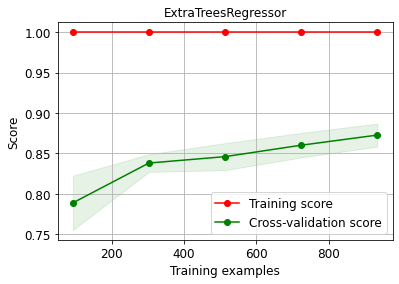

************************************************ RandomForestRegressor *****************************************************
MEAN SQUARED ERROR 0.026503902501082928


MEAN ABSOLUTE ERROR 0.11032290762232635


CVS_SCORE 0.8643428517993448


R2_SCORE 0.8383956957720289


RMSE 0.16280019195652973


MODEL PERFORMANCE CURVE


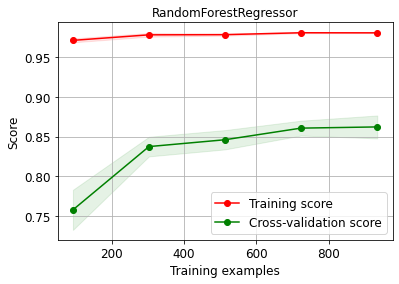

************************************************ LinearRegression *****************************************************
MEAN SQUARED ERROR 0.02130674072084665


MEAN ABSOLUTE ERROR 0.09409424022573229


CVS_SCORE 0.8755369960661417


R2_SCORE 0.8700847541445071


RMSE 0.14596828669559236


MODEL PERFORMANCE CURVE


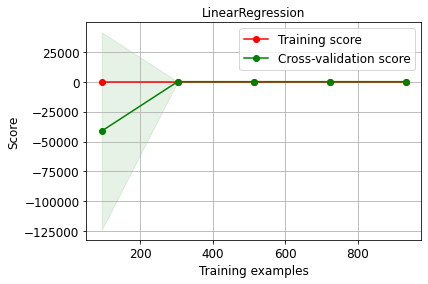

************************************************ DecisionTreeRegressor *****************************************************
MEAN SQUARED ERROR 0.048274709838593687


MEAN ABSOLUTE ERROR 0.15156997299179242


CVS_SCORE 0.705899899697925


R2_SCORE 0.7056508604740617


RMSE 0.21971506511523894


MODEL PERFORMANCE CURVE


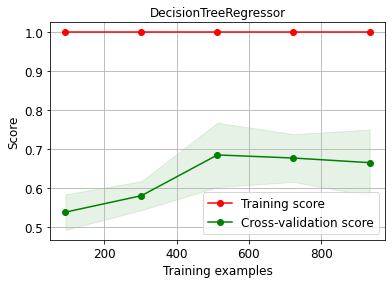

************************************************ Lasso *****************************************************
MEAN SQUARED ERROR 0.16422438702087788


MEAN ABSOLUTE ERROR 0.31972702403325554


CVS_SCORE -0.00531539686865643


R2_SCORE -0.0013381161770285033


RMSE 0.4052460820549384


MODEL PERFORMANCE CURVE


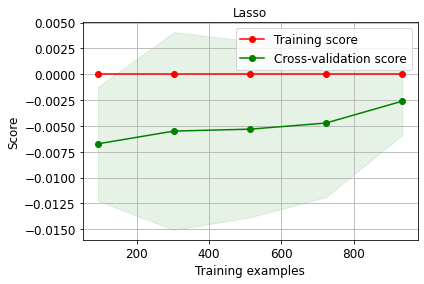

************************************************ LGBMRegressor *****************************************************
MEAN SQUARED ERROR 0.021740267479149557


MEAN ABSOLUTE ERROR 0.0962166551556331


CVS_SCORE 0.8748838350893149


R2_SCORE 0.867441377753544


RMSE 0.14744581200952964


MODEL PERFORMANCE CURVE


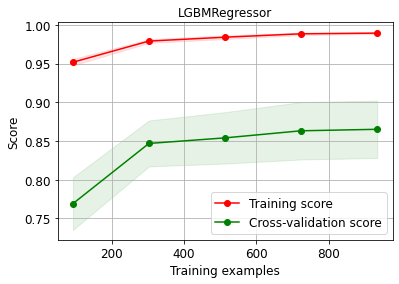

In [50]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
NAME=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
  print("************************************************",name,"*****************************************************")
  NAME.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('\n')
  print("MEAN ABSOLUTE ERROR",mae)
  cvs=cross_val_score(model,X_new,np.log(y),scoring='r2',cv=kf).mean()
  CVS.append(cvs)
  print('\n')
  print("CVS_SCORE",cvs)
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print('\n')
  print("R2_SCORE",r2)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplt.estimators.plot_learning_curve(model,X_new,np.log(y),cv=kf,scoring='r2',title=name,text_fontsize='large')
  plt.show()

In [51]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

In [52]:
models_result

NAME  Cross_Val_Score  ...  Mean_Absolute_Error      RMSE
0    ExtraTreesRegressor         0.865905  ...             0.104837  0.155103
1  RandomForestRegressor         0.864343  ...             0.110323  0.162800
2       LinearRegression         0.875537  ...             0.094094  0.145968
3  DecisionTreeRegressor         0.705900  ...             0.151570  0.219715
4                  Lasso        -0.005315  ...             0.319727  0.405246
5          LGBMRegressor         0.874884  ...             0.096217  0.147446

[6 rows x 6 columns]

**There are some models like linearregression and lasso they are showing a good result but when we see there learning curve we can see these are underfitted so i am choosing lightgbm as my best model because it is performing good and also have a good learning curve**

In [53]:
lgb=LGBMRegressor()

#Hyperparameter Tuning

In [54]:
param={
    'boosting_type': ['gbdt','dart'],
    'n_estimators':[100,200,500,600],
    'importance_type': ['mse','mae'],
    'max_depth': [-1,1,2,3,4,5]
}

In [55]:
GRID=GridSearchCV(estimator=lgb,scoring='r2',param_grid=param,n_jobs=-1,cv=kf)

In [56]:
GRID.fit(X_new,np.log(y))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'importance_type': ['mse', 'mae'],
                         'max_depth': [-1, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 500, 600]},
             scoring='r2')

In [57]:
GRID.best_score_

0.8763136893039623

*accuracy increased from 86 to 87.63*

In [58]:
GRID.best_params_

{'boosting_type': 'gbdt',
 'importance_type': 'mse',
 'max_depth': 2,
 'n_estimators': 500}

*These are our best parameters*

In [59]:
light=LGBMRegressor(boosting_type= 'gbdt',
 importance_type= 'mse',
 max_depth= 3,
 n_estimators= 200)

#Final Model Learning Curve

MODEL PERFORMANCE CURVE


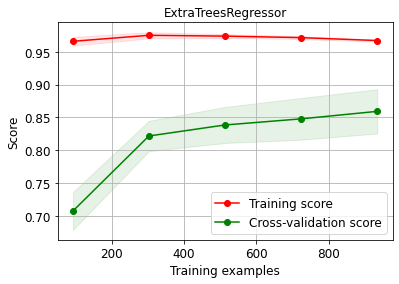

In [60]:
print('MODEL PERFORMANCE CURVE')
skplt.estimators.plot_learning_curve(light,X_new,y,cv=kf,scoring='r2',title='ExtraTreesRegressor',text_fontsize='large')
plt.show()

In [61]:
light.fit(X_train,y_train)
y_predicted=light.predict(X_test)

#Final Model Performance Metrics

In [62]:
print("Mean Squared Error",mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predicted)))
print("R2 Score",r2_score(y_test,y_predicted))

Mean Squared Error 0.0203794875635031
Mean Absolute Error 0.09366757992141704
RMSE 0.14275674262010568
R2 Score 0.8757385668737673


#Saving Model

In [63]:
import joblib
joblib.dump(GRID,"House_price_model.obj")

['House_price_model.obj']

Loading Model

In [64]:
model=joblib.load('/content/House_price_model.obj')

Loading our train data

In [65]:
test=pd.read_csv('/content/test.csv')

passing test data through pipeline

In [66]:
Test=pipe.fit_transform(test)

In [67]:
Test=Test.drop(['MiscVal','HighQualSF'],axis=1)

dropping these two columns because these were highly correlated. now why i have not mentioned them in pipeline for dropping because i have to analysis of this data in this file only if i was doing analysis of this project somewhere else i will be mentioning them in pipeline

*Prediction*

In [68]:
Test=model.predict(Test)

In [69]:
Test_price=pd.DataFrame(Test,columns=['SalePrice'])

In [70]:
TEST=pd.read_csv('/content/test.csv')

Now here i am creating a predicted column in test file so we can see the prices of home in test file

In [71]:
TEST['SalePrice']=np.exp(Test_price)           #As i said above i have inversed my prediction so it can predict right see the saleprice for more

In [72]:
TEST

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition      SalePrice
0     337          20       RL  ...        WD         Normal  369263.716791
1    1018         120       RL  ...       COD        Abnorml  186279.950578
2     929          20       RL  ...        WD         Normal  256945.928569
3    1148          70       RL  ...        WD         Normal  189767.966595
4    1227          60       RL  ...        WD         Normal  201697.731191
..    ...         ...      ...  ...       ...            ...            ...
287    83          20       RL  ...        WD         Normal  243407.785284
288  1048          20       RL  ...        WD         Normal  134984.223552
289    17          20       RL  ...        WD         Normal  152056.990875
290   523          50       RM  ...        WD         Normal  167622.836664
291  1379         160       RM  ...        WD         Normal   99065.494431

[292 rows x 81 columns]

#Obseravtion

**Key Findings and Conclusions of the Study**

From the upper study I have learned many things like which feature effecting the outcome more and which is important and which is not and I observed many things like.
1-Total Rooms Above Ground-As the room no. increasing the average price is also increasing till 11th room after that price start decreasing

2-Bedroom ABove Ground-For the 0,4,8 Bedroom price is high and price is very less for 6 and 2

3-Kitchen Above Ground-as the no of kitchen is increasing the price is reducing and mostly people take one kitchen only

4-In Basement full bathrrom and half bathrooms as the bathroom size increasing the price is also increasing

5-Fireplaces-As the fireplaces increasing the sale price is also increasing

6-PoolArea-as big the pool the more costly the house

7-YRsold-the price was high in 2006 as comapre to old year prices descresed in 2008-10

8-MOSold-most of the people who sold there home in 09 month they got high price and people who sold there home on 4th month got less price

9-Electrical-Most of the properties have standard circuit breakers and having highest average sale price of 170000.
Properties with poor fuse box system and mixed system have less than 10000 sale price.

10-Heating Quality-It can be clearly seen in the box plot.

11-Heating-Heating in the wall or hot water/steam is associated with very low houses prices. Gas Formed warm air appears to drive a higher sales price

12-Central AC- The properties which have AC will have higher price that the ones which dont have

These are the some few things.


**Learning Outcomes of the Study in respect of Data Science**

•	From this dataset I have learned in most of every case tree base model always work very well
•	I was facing the lack of data problem in this problem because the dataset was very less but I build my model at the end
•	I was also facing the multicollinearity problem because I was having many columns so there were two columns which where highly correlated to each other more then 90% so I dropped one of them
•	And the above study helped us to understand how the price change across the 
properties like with more rooms, with big pool and all.

**Limitations of this work and Scope for Future Work**

•	The limitation of this work is we can only use to predict the price of houses we can’t use to somewhere else

•	And for future work I can say many companies can get more profit by using this model.
 
•	If a builder wants to build a new building or something he can choose the property according with the help of this model where he can understand what type of property people usually buy at which prices what more things, he needs to add to get a good amount of profit.
